In [107]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sign
from decimal import *
import sympy as sp

#Defino precision por defecto 

default_prec= getcontext().prec

# tolerancia , precision e iteraciones por defecto 
tol =10**(-16)
prec=10**(-16)
nmax=100
default_prec

28

**Ejercicio 1.** Teniendo en cuenta la recomendación explicada sobre los criterios de parada, codifica una función similar a la explicada en el método de bisección para el método de la secante.

Aproxima la raíz de la función $f(x)=e^x-3$:
* Cambiando la precisión a 5 cifras significativas.
* Con la precisión por defecto y aproximando la raíz con 28 cifras significativas.

In [6]:
def secante(f, x0, x1, nmax=nmax, prec=prec, tol=tol):

    niter = 0
    cont = True
    exit = ''
    while niter < nmax and cont:
        niter += 1
        xn1 = x1 - (((x1 - x0) / (f(x1) - (f(x0)))) * f(x1))
       

        if abs(f(xn1)) < prec:
            exit = 'precision'
            cont = False
        
        if abs(x1 - xn1) < tol:
            exit = 'tolerancia'
            cont = False
        

    if exit == 'precision':
        print(f'Posiblemente solución exacta: {xn1}')
    elif exit == 'tolerancia':
        print(f'Aproximación solicitada: {xn1}')
    else:
        print(f'Se llegó al número máximo de iteraciones ')
    return xn1, niter, exit


def f(x):
    return np.exp(x) -3

x0=Decimal(1)
x1=Decimal(2)
#Pongo la precision a 5 cifras 
getcontext().prec=5
print(f"Precision: {getcontext().prec}")
raiz ,iter ,salida =secante(f, x0, x1, nmax=1000, prec=1e-28, tol=1e-28)
print(f"Raiz : {raiz}")
print(f"Numero de iteraciones : {iter}")

#Pongo la precision por defecto
getcontext().prec=default_prec
print(f"Precision: {getcontext().prec}")
raiz ,iter ,salida =secante(f, x0, x1, nmax=1000, prec=1e-28, tol=1e-28)
print(f"Raiz : {raiz}")
print(f"Numero de iteraciones : {iter}")


Precision: 5
Se llegó al número máximo de iteraciones 
Raiz : 1.0603
Numero de iteraciones : 1000
Precision: 28
Se llegó al número máximo de iteraciones 
Raiz : 1.060315090224325883983432700
Numero de iteraciones : 1000


**Ejercicio 2.** Teniendo en cuenta estos primeros pasos, codifica una función para el método de Wittaker.

Aproxima la raíz de la función $f(x)=e^x-3$:
* Cambiando la precisión a 5 cifras significativas.
* Con la precisión por defecto y aproximando la raíz con 28 cifras significativas.

Comprueba que una mala elección de $m$ puede provocar que la sucesión no converja.

In [11]:

def wittaker(f, x0, m, nmax=nmax, prec=prec, tol=tol):

    
    niter = 0
    cont = True
    exit = ''
    while niter < nmax and cont:
        niter += 1
        xn = x0 - (f(x0) / m)
       
        if abs(f(xn)) < prec:
            exit = 'precision'
            cont = False

        if abs(x0 - xn) < tol:
            exit = 'tolerancia'
            cont = False
        x0=xn
    if exit == 'precision':
        print(f'Posiblemente solución exacta: {xn}')
    elif exit == 'tolerancia':
        print(f'Aproximación solicitada: {xn}')
    else:
        print(f'Se llegó al número máximo de iteraciones ')
    return xn, niter, exit
x0=Decimal(0.9)
m=Decimal(2)
#Pongo la precision a 5 cifras 
getcontext().prec=5
print(f"Precision: {getcontext().prec}")
raiz ,iter ,salida =wittaker(f,x0,m,nmax=1000, prec=1e-25, tol=1e-25)
print(f"Raiz : {raiz}")
print(f"Numero de iteraciones : {iter}")
#Pongo la precision por defecto
getcontext().prec=default_prec
print(f"Precision: {getcontext().prec}")
raiz ,iter ,salida =wittaker(f,x0,m,nmax=1000, prec=1e-25, tol=1e-25)
print(f"Raiz : {raiz}")
print(f"Numero de iteraciones : {iter}")




Precision: 5
Posiblemente solución exacta: 1.0986
Raiz : 1.0986
Numero de iteraciones : 12
Precision: 28
Aproximación solicitada: 1.098612288668109691395245206
Raiz : 1.098612288668109691395245206
Numero de iteraciones : 82


**Ejercicio 3.** Modifique el método anterior para que, en lugar de fijar una pendiente $m$, calcule en cada iteración la derivada de la función en dicho punto, obteniendo el método de Newton-Raphson. Con este método:

Aproxima la raíz de la función $f(x)=e^x-3$:
* Cambiando la precisión a 5 cifras significativas.
* Con la precisión por defecto y aproximando la raíz con 28 cifras significativas.

Compare, en iguales condiciones, el rendimiento de Newton-Raphson con respecto al método de Wittaker.

In [97]:
def df(x):
    return np.exp(x)


def NewtonRaphson(f, df, x0, nmax=nmax, prec=prec, tol=tol):

    niter = 0
    cont = True
    exit = ''
    sucesion=[] ## para el ejercicio de aceleracion, necesitamos saber la sucesion 
    while niter < nmax and cont:
        niter += 1
        xn = x0 - (f(x0) / df(x0))
        sucesion.append(xn)
        if abs(x0 - xn) < tol:
            exit = 'tolerancia'
            cont = False
        if abs(f(xn)) < prec:
            exit = 'precision'
            cont = False

        x0 = xn

    if exit == 'precision':
        print(f'Posiblemente solución exacta: {xn}')
    elif exit == 'tolerancia':
        print(f'Aproximación solicitada: {xn}')
    else:
        print(f'Se llegó al número máximo de iteraciones ')
    return xn, niter, exit,sucesion
x0=Decimal(0.9)
m=Decimal(2)
#Pongo la precision a 5 cifras 
getcontext().prec=5
print(f"Precision: {getcontext().prec}")
raiz ,iter ,salida,sucesion =NewtonRaphson(f,df,x0,nmax=1000, prec=1e-25, tol=1e-25)
print(f"Raiz : {raiz}")
print(f"Numero de iteraciones : {iter}")
#Pongo la precision por defecto
getcontext().prec=default_prec
print(f"Precision: {getcontext().prec}")
raiz ,iter ,exit ,sucesion =NewtonRaphson(f,df,x0,nmax=1000, prec=1e-25, tol=1e-25)
print(f"Raiz : {raiz}")
print(f"Numero de iteraciones : {iter}")

   

Precision: 5
Posiblemente solución exacta: 1.0986
Raiz : 1.0986
Numero de iteraciones : 3
Precision: 28
Posiblemente solución exacta: 1.098612288668109691395245237
Raiz : 1.098612288668109691395245237
Numero de iteraciones : 5


**Ejercicio 4.** Demuestre que la ecuación  $x^3+4 x^2=10  $  tiene una única raíz en el intervalo $[1,2]$.  Aproxime dicha raíz con el método de bisección con al menos 3 cifras decimales exactas. ¿Cuántas iteraciones serán necesarias para conseguir 5 cifras decimales exactas (tol =$10^{-5}$)?  Aproxime también la raíz con el método de Newton-Raphson partiendo del extremo adecuado hasta que la diferencia en valor absoluto, entre dos aproximaciones consecutivas sea  inferior a  $10^{-3}$.

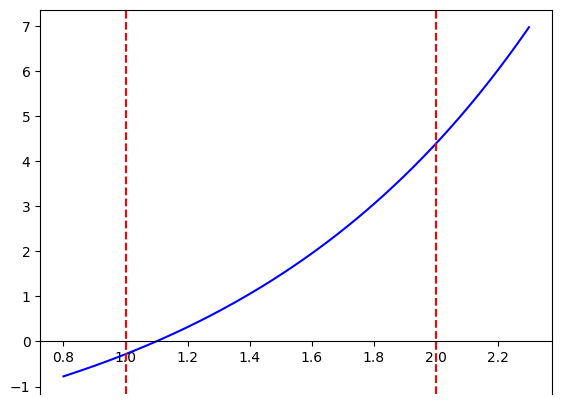

Precision: 28
Aproximación solicitada: 1.0986328125
Raiz : 1.0986328125
Numero de iteraciones : 10
Aproximación solicitada: 1.09860992431640625
Raiz : 1.09860992431640625
Numero de iteraciones : 17
Numero de iteraciones para 5 cifras exactas : 17
Precision: 28
Aproximación solicitada: 1.098612288747607579574966041
Raiz : 1.098612288747607579574966041
Numero de iteraciones : 3


In [ ]:
def f1(x):
    return x**3 +4*(x**2) -10
def df1(x):
    return 3*(x**2) +4*(x**2) -10

def biseccion(f, a, b, nmax=nmax, prec=prec, tol=tol):

    niter = 0
    cont = True
    exit = ''
    while niter < nmax and cont:
        niter += 1
        c = (a + b) / 2
        if abs(f(c)) < prec:
            exit = 'precision'
            cont = False
        elif sign(f(a)) != sign(f(c)):
            b = c
        else:
            a = c

        if abs(b - a) < tol:
            exit = 'tolerancia'
            cont = False

    if exit == 'precision':
        print(f'Posiblemente solución exacta: {c}')
    elif exit == 'tolerancia':
        print(f'Aproximación solicitada: {c}')
    else:
        print('Se llegó al número máximo de iteraciones')
    return c, niter, exit

x = np.linspace(0.8, 2.3, 150)
y = f(x)  

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.spines['bottom'].set_position('zero')
ax.plot(x, y, 'b')

ax.axvline(x=1, color='r', linestyle='--')
ax.axvline(x=2, color='r', linestyle='--')
plt.show()

## Vemos que en el intervalo [1,2] marcado por las lineas rojas la funcion corta una sola vez a la recta x=0 por tanto solo tiene una raiz en ese intervalo
## De forma teorica podriamos ver que f(1)*f(2)<0 y f es continua por tanto por el teorema  de bolzano hay una raiz en [1,2] y como es f estrictamente creciente seria unica
## Por tanto podemos confiar en la grafica y ver que hay una unica raiz en este intervalo 

x0=Decimal(1)
x1=Decimal(2)
#Pongo la precision por defecto

getcontext().prec=default_prec
print(f"Precision: {getcontext().prec}")
raiz ,iter ,salida =biseccion(f,x0,x1,nmax=1000, prec=1e-25, tol=1e-3)
print(f"Raiz : {raiz}")
print(f"Numero de iteraciones : {iter}")
raiz ,iter ,salida =biseccion(f,x0,x1,nmax=1000, prec=1e-25, tol=1e-5)
print(f"Raiz : {raiz}")
print(f"Numero de iteraciones : {iter}")
print(f"Numero de iteraciones para 5 cifras exactas : {iter}")
#
print(f"Precision: {getcontext().prec}")
raiz ,iter ,salida,sucesion =NewtonRaphson(f,df,x0,nmax=1000, prec=1e-25, tol=1e-3)
print(f"Raiz : {raiz}")
print(f"Numero de iteraciones : {iter}")


**Ejercicio 5.** Use el método de Newton-Raphson para aproximar las soluciones de las siguientes ecuaciones con tolerancia $10^{-5}$ , partiendo de un valor adecuado, próximo a cada una de ellas en cada caso.

1. $3x=2+x^2-e^x$.

2. $x^2+10 \cos x+x=0$.

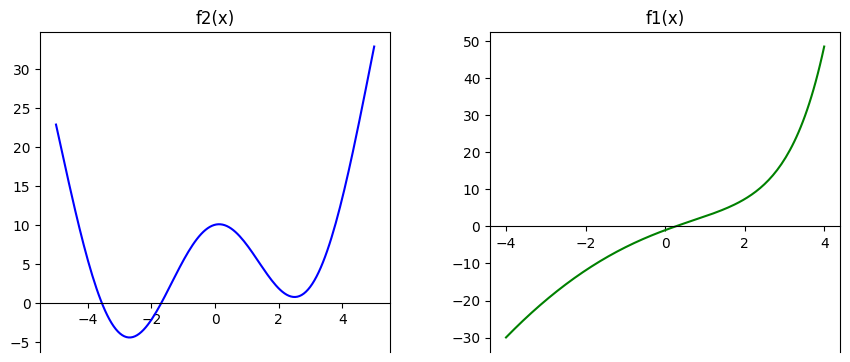

Aproximación solicitada: 0.2575284005423262186789227189
Raiz : 0.2575284005423262186789227189
Aproximación solicitada: -3.5623314972388327
Aproximación solicitada: -1.68693989979924


In [ ]:
def f1(x):
   return 3*x -2 -x**2 +np.exp(x)
def f2(x):
   return x**2 + 10*np.cos(x) +x
def df1(x):
   return 3 -2*x -np.exp(x)
def df2(x):
   return 2*x -10*np.sin(x) +1
x2 = np.linspace(-5, 5, 150)
y2 = f2(x2)  
x1 = np.linspace(-4, 4, 150)
y1 = f1(x1)  

fig = plt.figure(figsize=(10, 4))
# Grafico f2
ax2 = fig.add_axes([0.1, 0.1, 0.35, 0.8])
ax2.spines['bottom'].set_position('zero')
ax2.plot(x2, y2, 'b')
ax2.set_title('f2(x)')

# Grafico f1
ax1 = fig.add_axes([0.55, 0.1, 0.35, 0.8])
ax1.spines['bottom'].set_position('zero')
ax1.plot(x1, y1, 'g')
ax1.set_title('f1(x)')

plt.show()
x01 = Decimal(-1)
x02 =-4
x02_2=-2

raiz ,iter ,salida,sucesion =NewtonRaphson(f1,df1,x01,1000000,1e-25,tol=1e-5) 
print(f"Raiz : {raiz}")
raiz ,iter ,salida ,sucesion=NewtonRaphson(f2,df2,x02,100,1e-25,1e-5) 
raiz ,iter ,salida ,sucesion=NewtonRaphson(f2,df2,x02_2,100,1e-25,1e-5) 

**Ejercicio 6.** Para la función  $ f(x)= 3 x^2+e^x-1$,

i) encuentre, mediante el método de bisección una aproximación de la raíz en $[0,1]$ con, al menos, cuatro decimales exactos (tol =$10^{-4}$), y determine el número de iteraciones realizadas;

ii) encuentre, mediante el método de Newton-Raphson, una aproximación de la raíz en $[0,1]$ con una tolerancia de $10^{-4}$, partiendo de $x_0=0$, y determine el número de iteraciones realizadas.  

In [104]:

def f3(x):
    return 3*(x**2) + np.exp(x)-1
def df3(x):
    return 6*x + np.exp(x)


x0=Decimal(0)
x1=Decimal(1)
getcontext().prec=default_prec
print(f"Precision: {getcontext().prec}")
raiz ,iter ,salida =biseccion(f3,x0,x1,nmax=1000, prec=1e-25, tol=1e-4)
print(f"Raiz : {raiz}")
print(f"Numero de iteraciones : {iter}")

raiz ,iter ,salida,sucesion =NewtonRaphson(f3,df3,x0,1000,1e-25,1e-4) 
print(f"Raiz : {raiz}")
print(f"Numero de iteraciones : {iter}")


Precision: 28
Aproximación solicitada: 0.00006103515625
Raiz : 0.00006103515625
Numero de iteraciones : 14
Posiblemente solución exacta: 0
Raiz : 0
Numero de iteraciones : 1


> **Ejercicio 7.** Implemente el método de iteración funcional de Steffensen para una función $f$. En particular, para la función $f(x)=e^x-3$:
> * Represente gráficamente las funciones $g$ definidas tanto para el método de Newton-Raphson como para el método de Steffensen, comprobando que ambas poseen un punto fijo en la raíz de $f$.
> * Aproxima su única raíz utilizando el método de Steffensen:
>     * Cambiando la precisión a 5 cifras significativas.
>     * Con la precisión por defecto y aproximando la raíz con 28 cifras significativas.

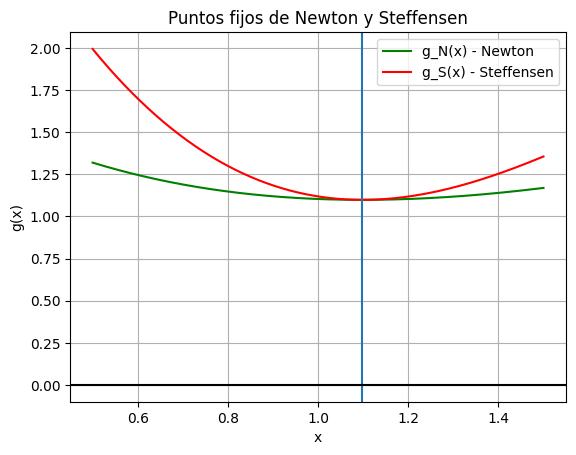

Punto fijo Newton : 1.0986122886681096 = ln(3) = 1.0986122886681098
Punto fijo Steffensen : 1.0986122886681096 = ln(3) = 1.0986122886681098


In [105]:

def Steffensen(f,x0, nmax=nmax, prec=prec, tol=tol):

    niter = 0
    cont = True
    exit = ''

    while niter < nmax and cont:
        niter += 1
        xn = x0 - ((f(x0)**2) / (f(x0+f(x0))-f(x0)))

        if abs(f(xn)) < prec:
            exit = 'precision'
            cont = False

        if abs(x0 - xn) < tol:
            exit = 'tolerancia'
            cont = False
        x0=xn
    if exit == 'precision':
        print(f'Posiblemente solución exacta: {xn}')
    elif exit == 'tolerancia':
        print(f'Aproximación solicitada: {xn}')
    else:
        print(f'Se llegó al número máximo de iteraciones ')
    return xn, niter, exit

g_newton = lambda x: x - f(x)/df(x)
g_steff = lambda x: x - (f(x)**2)/(f(x + f(x)) - f(x))

x_vals = np.linspace(0.5, 1.5, 400)
y_identity = x_vals
y_newton = g_newton(x_vals)
y_steff = g_steff(x_vals)


plt.plot(x_vals, y_newton, 'g', label='g_N(x) - Newton')
plt.plot(x_vals, y_steff, 'r', label='g_S(x) - Steffensen')
plt.legend()
plt.grid(True)
plt.xlabel("x")
plt.ylabel("g(x)")
plt.axvline(np.log(3), linestyle='-', label='x = ln(3)')
#plt.axhline(np.log(3), linestyle='-')
plt.axhline(0,color="black", linestyle='-')
plt.title("Puntos fijos de Newton y Steffensen")
plt.show()

## para comprobar que son un p0unto fijo veamos que g(x)=x con x=ln(3) que es la raiz de f= e^x -3

print(f"Punto fijo Newton : {g_newton(np.log(3))} = ln(3) = {np.log(3)}")
print(f"Punto fijo Steffensen : {g_steff(np.log(3))} = ln(3) = {np.log(3)}")

> **Ejercicio 8.** Implemente el método de aceleración de la convergencia de Steffensen y aplíquelo a una sucesión de valores obtenidos mediante iteración funcional de Newton-Raphson a la función $f(x) = e^x -3$. Compare las aproximaciones tras 4 iteraciones del método de Newton-Raphson, aceleración de la convergencia de Aitken y aceleración de la convergencia de Steffensen.

In [ ]:

def Aitken(sucesion):
    sucesionatiken =[]
    i=0
    cont = True
    exit = ''
    while i < range(len(sucesion)-2) and cont:
        xn = sucesion[i]-((sucesion[i+1]-sucesion[i])**2)/(sucesion[i+2]-2*sucesion[i+1]+sucesion[i])
        i+=1
        sucesionatiken.append(xn);
        if abs(sucesion[i]-xn)<tol:
            cont = False
            exit='tolerancia'
        if abs(f(xn))<prec:
            cont =False
            exit = 'precision'
        
    return sucesionatiken ,exit

def accStefenssen(x0,f,nmax=nmax,prec=prec,tol=tol):
    niter = 0
    cont = True
    exit = ''
    sucesion =[]
    g = lambda x: x - f(x)
    x1=g(x0)
    x2=g(x1)
    while niter and cont:
        niter+=1
        x_0 =Aitken([x0,x1,x2])
        sucesion.append[x_0]

        if abs(x0-x_0)<tol:
            cont = False
            exit='tolerancia'
        if abs(f(x_0))<prec:
            cont =False
            exit = 'precision'
        x0=x_0
        x1=g(x0)
        x2=g(x1)
        

    if exit == 'precision':
        print(f'Posiblemente solución exacta:{sucesion[-1]}')
    elif exit == 'tolerancia':
        print(f'Aproximación solicitada: {sucesion[-1]}')
    else:
        print(f'Se llegó al número máximo de iteraciones ')
    return sucesion, niter, exit





> **Ejercicio 9** Utilice las órdenes apropiadas de Python para aproximar todos los puntos donde se anulan las funciones siguientes (si es necesario, represéntelas gráficamente):
> 
> i) $f(x)=x^7-x^4+2$ ,
> 
> ii) $f(x)=x^7+\cos  x-3$.

[-1.00000000000000, -0.713102145851293 - 0.98823188827156*I, -0.713102145851293 + 0.98823188827156*I, 1.06110281046036 - 0.376384046559108*I, 1.06110281046036 + 0.376384046559108*I, 0.151999335390936 - 1.01945594669063*I, 0.151999335390936 + 1.01945594669063*I]


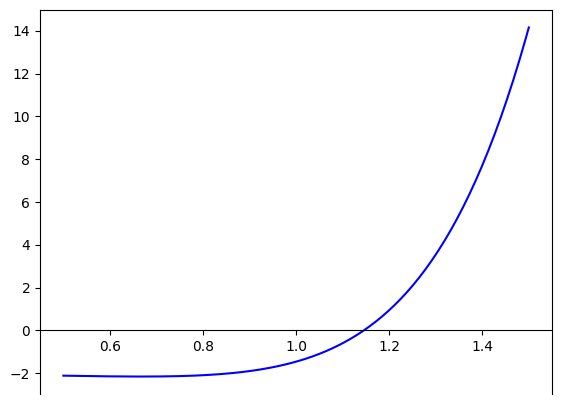

In [ ]:


##uso sympy para resolver 
#primera ecuacion
x=sp.Symbol('x')
soluciones1=sp.solve(x**7 -x**4 +2)
soluciones1_numericas = [s.evalf() for s in soluciones1]
print(soluciones1_numericas)

#uso fsolve
def h(a):
    return a**7 +np.cos(a) -3

x = np.linspace(0.5, 1.5, 150)
y = h(x)  

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.spines['bottom'].set_position('zero')
ax.plot(x, y, 'b')
plt.show()




> **Ejercicio 10:** De los métodos implementados en los anteriores ejercicios, utiliza el método o métodos numéricos que desees para aproximar la primera raíz de la función
> $$
> f:[0,1]\longrightarrow\mathbb R \\
> f(x) = x(1-x)\sin\left(\dfrac{2\pi}{x+1/10}\right)
> $$
> que sea mayor que una milésima con una precisión de 28 cifras significativas y utilizando el menor número de iteraciones posible. Imprime por pantalla tu aproximación y el número de iteraciones utilizado.

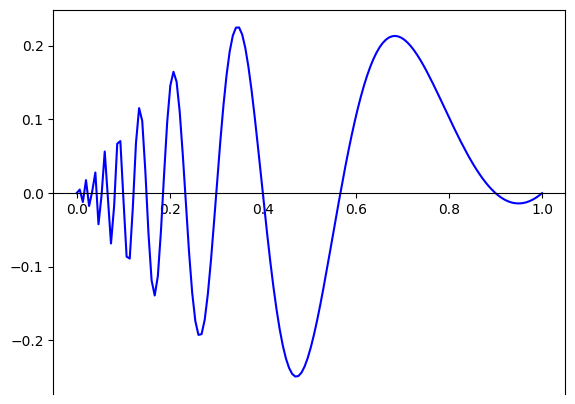

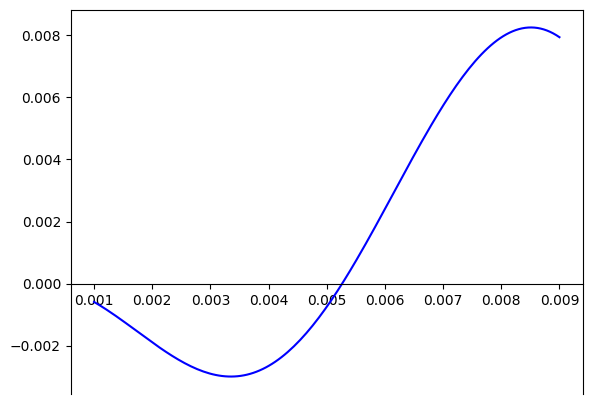

In [143]:
def f4(x):
    return x*(1-x)*np.sin((2*np.pi)/(x+(1/10)))

x = np.linspace(0, 1, 150)
y = f4(x) 

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.spines['bottom'].set_position('zero')
ax.plot(x, y, 'b')
plt.show()

## Como la raiz tiene que ser mayor que una milesima voy a graficar la funcion cerca del punto que nos interesa que es el 0,001
x = np.linspace(0.001, 0.009, 150)
y = f4(x) 
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.spines['bottom'].set_position('zero')
ax.plot(x, y, 'b')
plt.show()

#Vemos que la primera raiz mayor que 0,001 esta en el intervalo [0,005 , 0,006] por tanto
# aplicaremos el metodo de newtoraphson en un punto de ese intervalo